# The I-94 Traffic Dataset

## Introduction

This project will analyse a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The dataset is available for download from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The aim of the analysis is to determine some indicators of heavy traffic on I-94.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analysing Traffic Volume

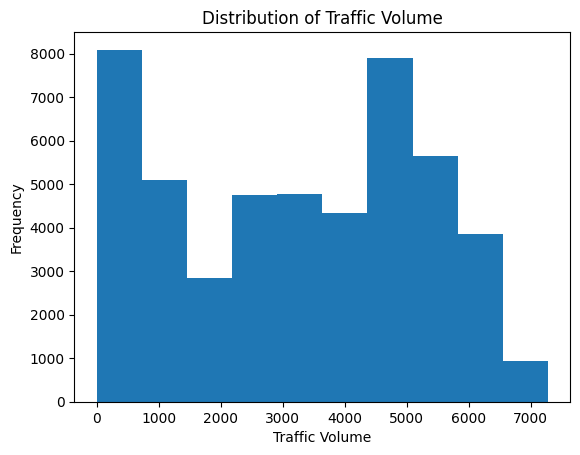

In [7]:
# Plot a histogram to examine the distribution of the 'traffic_volume' column
traffic['traffic_volume'].plot.hist()
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.show()

In [8]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Traffic Volume: Day vs. Night

In [9]:
# Transform 'date_time' column for datetime data type
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [10]:
daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)].copy()
nighttime = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)].copy()

In [11]:
print(f"Number of daytime records: {len(daytime)}")
print(f"Number of nightttime records: {len(nighttime)}")
print(f"Total number of records combined: {len(daytime) + len(nighttime)}")
print(f"Check (Total number of records in traffic: {len(traffic)}")

Number of daytime records: 23877
Number of nightttime records: 24327
Total number of records combined: 48204
Check (Total number of records in traffic: 48204


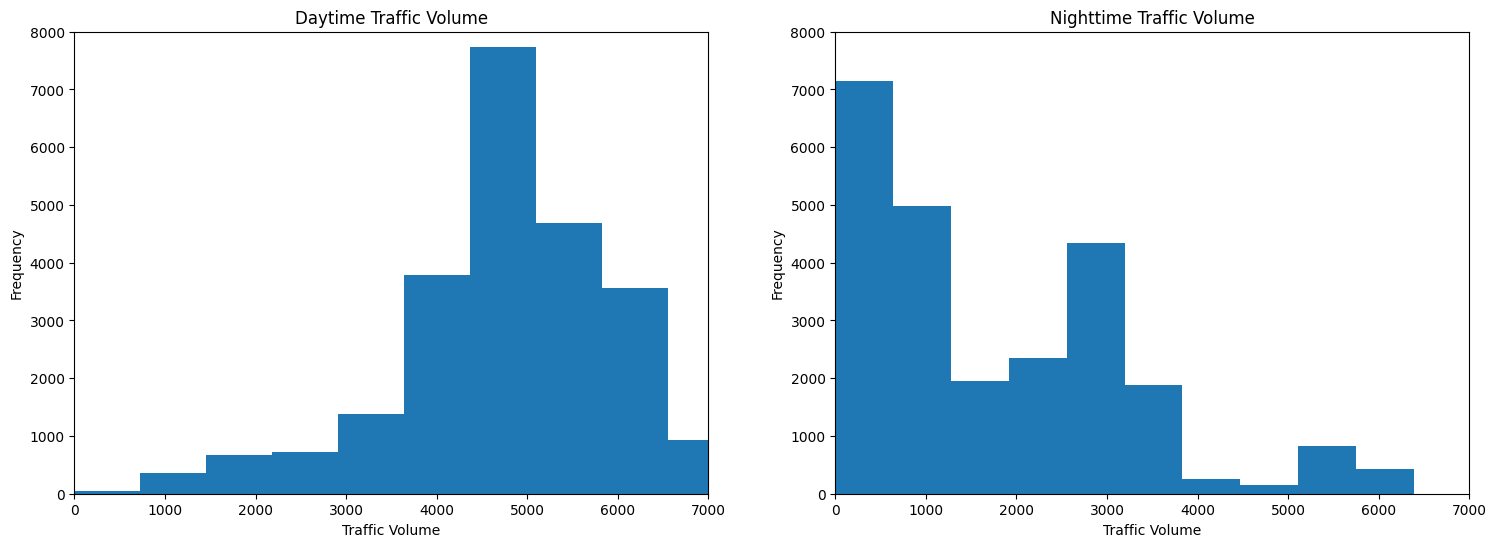

In [12]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim((0, 8000))
plt.xlim((0, 7000))
plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim((0, 7000))
plt.ylim((0, 8000))
plt.show()

In [13]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the daytime histogram, the day time traffic is left skewed indicating that there are more heavy periods during the day.

The nightime histogram, however, is right skewed, indicating that there are more periods of little or no traffic in this period.

To find indicators of heavy traffic, it is probably more useful to analyse the daytime results.

## Time Indicators

In [15]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

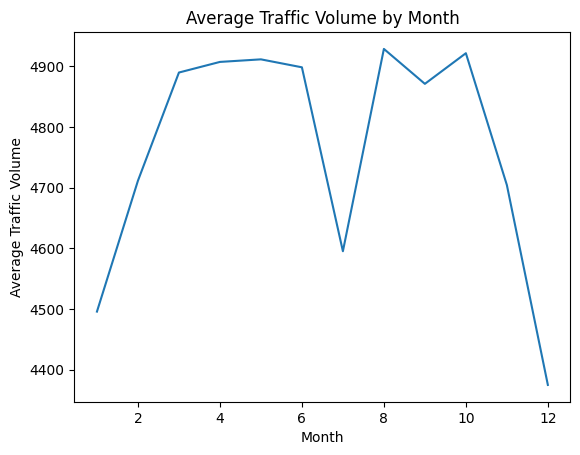

In [16]:
by_month['traffic_volume'].plot()
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

The line plot of Average Traffic Volume by Month shows a clear drop off in the volume of traffic in the December and January as well as a dip in July.

In [17]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

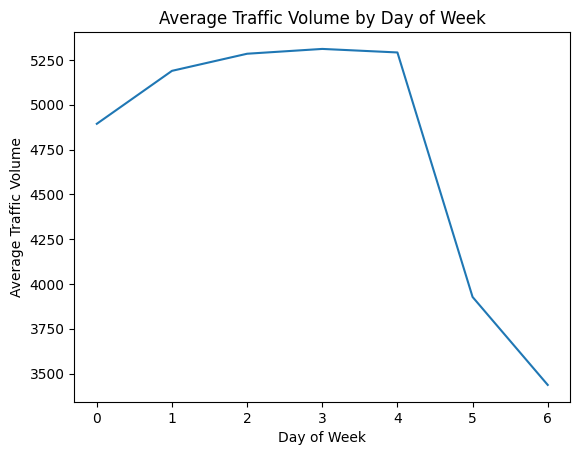

In [18]:
by_dayofweek['traffic_volume'].plot()
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.show()

The line plot of Average Traffic Volume by Day of Week clearly shows that traffic volume is lower at weekends than during the week.

In [19]:
daytime['hour'] = daytime['date_time'].dt.hour
business_daytime = daytime[daytime['dayofweek'] <= 4].copy()
weekend_daytime = daytime[daytime['dayofweek'] >= 5].copy()
by_hour_business_daytime = business_daytime.groupby('hour').mean(numeric_only=True)
by_hour_weekend_daytime = weekend_daytime.groupby('hour').mean(numeric_only=True)

print(by_hour_business_daytime['traffic_volume'])
print(by_hour_weekend_daytime['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


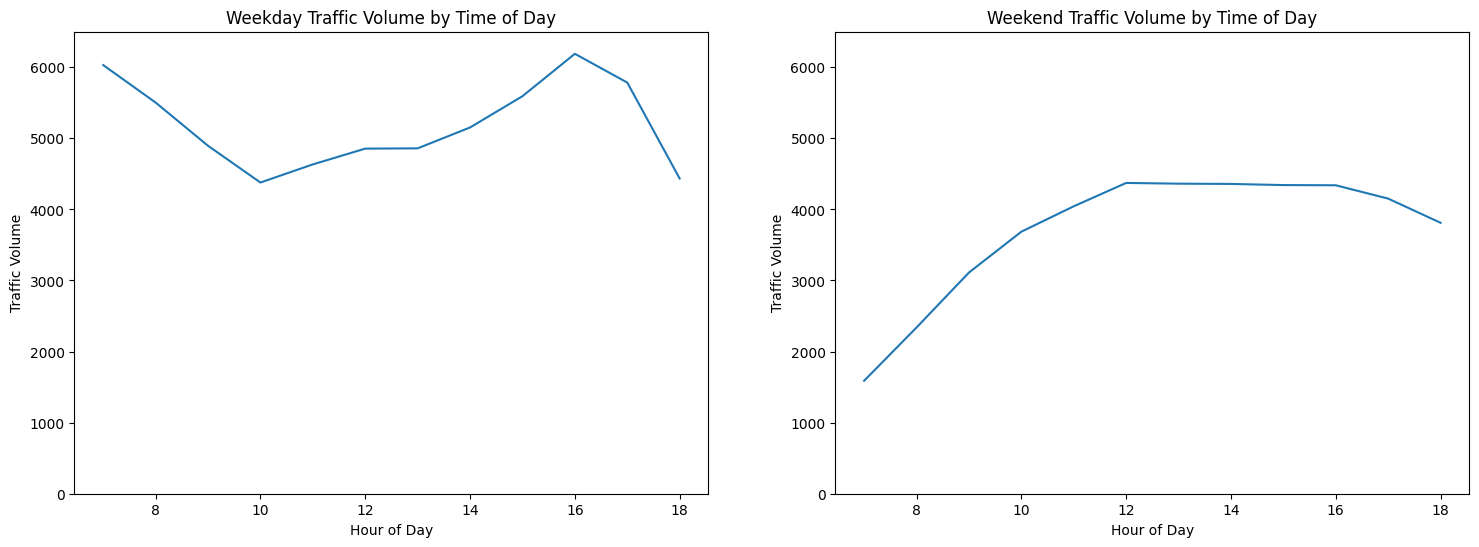

In [20]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
by_hour_business_daytime['traffic_volume'].plot()
plt.title('Weekday Traffic Volume by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.ylim((0, 6500))
# plt.xlim((0, 7000))
plt.subplot(1, 2, 2)
by_hour_weekend_daytime['traffic_volume'].plot()
plt.title('Weekend Traffic Volume by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
# plt.xlim((0, 7000))
plt.ylim((0, 6500))
plt.show()

Traffic is busiest on weekdays from 7 to 8 in the morning and 3 to 5 in the afternoons, whereas on weekends, it gets busier in the middle of the day.

It never gets as busy on a weekend as it does at its quietest during the week.

From this we can see that traffic is heaviest in Spring to late  and Autumn weekdays at normal rush hour times.

# Weather Indicators

In [23]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [36]:
traffic[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr()['traffic_volume'][1:]

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64

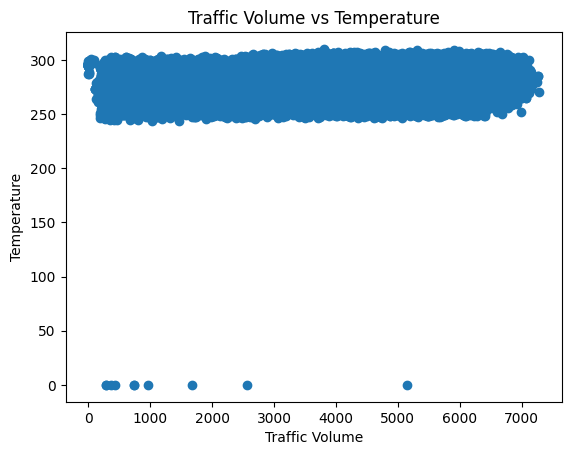

In [39]:
plt.scatter(traffic['traffic_volume'], traffic['temp'])
plt.title('Traffic Volume vs Temperature')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.show()

All of the weather variables have low correlation and are therefore not likely to be reliable indicators for heavy traffic.

# Weather Types

In [40]:
by_weather_main = daytime.groupby('weather_main').mean(numeric_only=True)
by_weather_description = daytime.groupby('weather_description').mean(numeric_only=True)

In [45]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


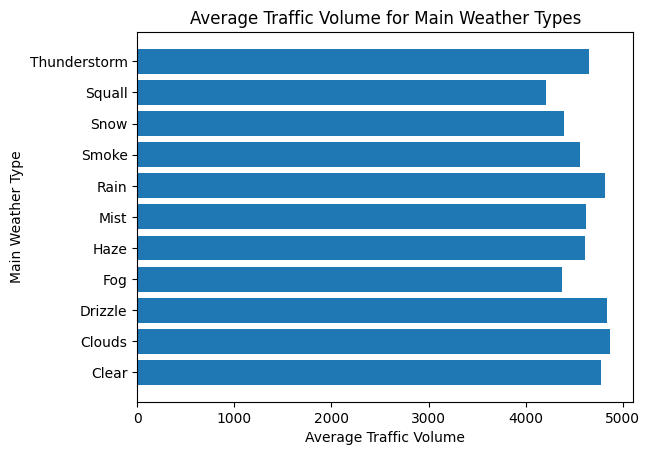

In [47]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.title('Average Traffic Volume for Main Weather Types')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Main Weather Type')
plt.show()

There doesn't seem to be an indicator of heavy traffic based on the main types of weather recorded.

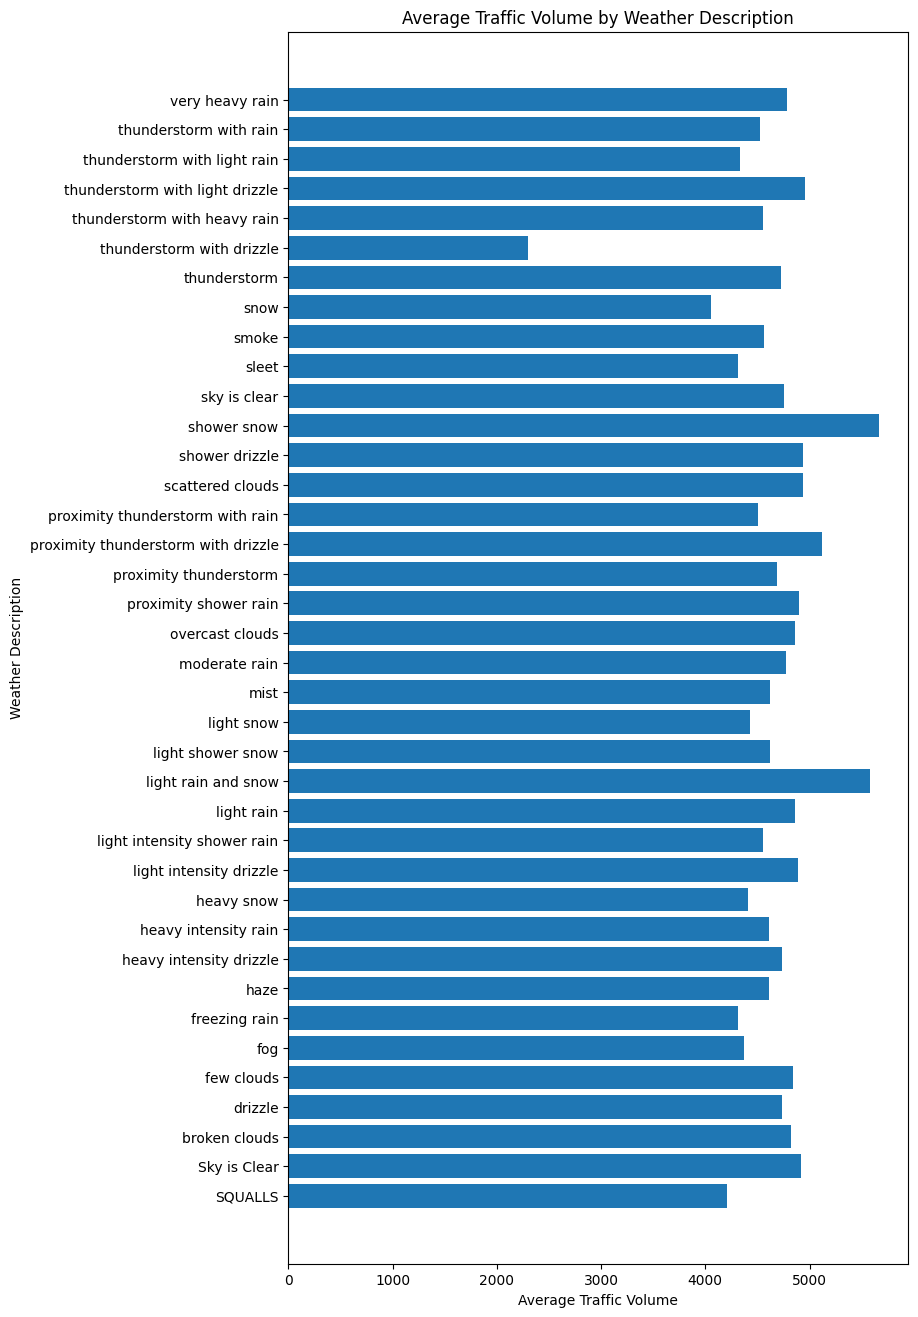

In [49]:
plt.figure(figsize=(8, 16))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.title('Average Traffic Volume by Weather Description')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

There are a couple of categories of weather description that have an average traffic volume exceeding 5,000. They both have 'snow' in the description but there is no evidence of a pattern. Therefore it is unlikely that the weather description is an indicator of heavy traffic.

## Conclusion

It is unlikely that the weather has an effect on the volume of traffic.

The season, day of the week and the hour of the day are likely indicators of heavy traffic. Traffic tends to be heavier from April to October (with a dip in volume in July in this dataset). It is also busier on business days than at weekends.